In [179]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# 0. Carga de los datos

In [3]:
import os 
ruta = os.getcwd()
print(ruta)

/Users/duman/Documents/universidad/7semestre/BI/BI-202302/Lab2


In [139]:
df_laptops_train = pd.read_csv('./data/laptop_data_train.csv', sep=',', encoding='utf-8')

In [140]:
df_laptops_train.shape

(1216, 14)

In [141]:
df_laptops_train.sample(5)

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
892,1220,MSI,Gaming,8,2.20,11.272727,0,0,141.211998,Intel Core i7,1000.0,128,Nvidia,Windows
731,1049,Asus,Netbook,4,1.20,9.638174,0,0,135.094211,Other Intel Processor,0.0,0,Intel,Others
406,350,Dell,Notebook,16,2.06,11.590080,1,0,282.423996,Intel Core i7,0.0,512,Nvidia,Windows
564,325,Lenovo,Notebook,4,1.44,9.652315,0,0,111.935204,Other Intel Processor,0.0,0,Intel,Windows
446,776,Lenovo,Notebook,16,2.50,11.746206,0,0,282.423996,Intel Core i7,0.0,512,Nvidia,Windows


In [142]:
df_laptops_unlabeled = pd.read_csv('./data/laptop_data_test_unlabeled.csv', sep=',', encoding='utf-8')

In [143]:
df_laptops_unlabeled.shape

(64, 14)

In [144]:
df_laptops_unlabeled.sample(5)

,id,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,CalculatedPrice
48,1110,HP,Notebook,8,1.16,1,0,276.053530,Other Intel Processor,0.0,256,Intel,Windows,NaN
38,1171,HP,Notebook,16,2.10,0,0,141.211998,Intel Core i7,0.0,512,Intel,Windows,NaN
20,1035,HP,Ultrabook,8,1.26,0,0,176.232574,Intel Core i7,0.0,256,Intel,Windows,NaN
60,750,Lenovo,Netbook,4,1.40,1,0,135.094211,Other Intel Processor,0.0,128,Intel,Windows,NaN
59,1088,HP,Notebook,4,1.29,0,0,276.053530,Other Intel Processor,0.0,0,Intel,Others,NaN


In [145]:
df_laptops_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1216 non-null   int64  
 1   Company      1216 non-null   object 
 2   TypeName     1216 non-null   object 
 3   Ram          1216 non-null   int64  
 4   Weight       1193 non-null   float64
 5   Price        1201 non-null   float64
 6   TouchScreen  1216 non-null   int64  
 7   Ips          1216 non-null   int64  
 8   Ppi          1204 non-null   float64
 9   Cpu_brand    1216 non-null   object 
 10  HDD          1200 non-null   float64
 11  SSD          1216 non-null   int64  
 12  Gpu_brand    1216 non-null   object 
 13  Os           1216 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 133.1+ KB


In [146]:
df_laptops_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1216 non-null   int64  
 1   Company      1216 non-null   object 
 2   TypeName     1216 non-null   object 
 3   Ram          1216 non-null   int64  
 4   Weight       1193 non-null   float64
 5   Price        1201 non-null   float64
 6   TouchScreen  1216 non-null   int64  
 7   Ips          1216 non-null   int64  
 8   Ppi          1204 non-null   float64
 9   Cpu_brand    1216 non-null   object 
 10  HDD          1200 non-null   float64
 11  SSD          1216 non-null   int64  
 12  Gpu_brand    1216 non-null   object 
 13  Os           1216 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 133.1+ KB


# 1. Entendimiento y limpieza de los datos

In [147]:
# Eleccion de variables relevantes para calcular el precio de un computador
features = [
    'Company',
    'TypeName',
    'Ram',
    'Weight',
    'TouchScreen',
    'Ips',
    'Ppi',
    'Cpu_brand',
    'HDD',
    'SSD',
    'Gpu_brand',
    'Os'
]
featuresCategoricas = ['Company', 'TypeName', 'TouchScreen', 'Ips', 'Cpu_brand', 'Gpu_brand', 'Os']
featuresNumericas = ['Ram', 'Weight', 'Ppi', 'HDD', 'SSD']

# Eliminar variables no en features (id)
df_laptops_train = df_laptops_train[['Price'] + features]
df_laptops_unlabeled = df_laptops_unlabeled[features]


### 1.1. Verificacion de atributos de calidad de datos

#### Consistencia: Valores únicos en las variables categóricas

In [148]:
# verificar valores unicos en cada variable categorica
for feature in featuresCategoricas:
    print(f'{feature}: {df_laptops_train[feature].unique()}')

Company: ['Lenovo' 'Dell' 'HP' 'Asus' 'Toshiba' 'Acer' 'MSI' 'Razer' 'Samsung'
 'Chuwi' 'Microsoft' 'Mediacom' 'LG' 'Vero' 'Apple' 'Huawei' 'Xiaomi'
 'Fujitsu' 'Google']
TypeName: ['Notebook' 'Ultrabook' '2 in 1 Convertible' 'Gaming' 'Netbook'
 'Workstation' '2 in 1 Convertible%%' 'Gaming%%' '&&Notebook'
 '&&Ultrabook' 'Notebook%%' '&&Gaming' '&&2 in 1 Convertible']
TouchScreen: [0 1]
Ips: [0 1]
Cpu_brand: ['Intel Core i3' 'Intel Core i5' 'Intel Core i7' 'AMD Processor'
 'Other Intel Processor']
Gpu_brand: ['Intel' 'Nvidia' 'AMD' 'Intel%%' 'Nvidia%%' '&&Intel' '&&Nvidia' 'AMD%%'
 '&&AMD']
Os: ['Others' 'Windows' 'Mac']


**Resultados:** Se puede observar que las variables 'TypeName' y 'Gpu_brand' tienen valores con caracteres extraños. Se procederá a eliminarlos para corregir esta información.

In [185]:
# Eliminar caracteres "&&", "%%", en las variables categoricas 'TypeName' y 'Gpu_brand'
df_laptops_train['TypeName'] = df_laptops_train['TypeName'].str.replace('&&', '').str.replace('%%', '')
df_laptops_train['Gpu_brand'] = df_laptops_train['Gpu_brand'].str.replace('%%', '').str.replace('&&', '')


In [189]:
# verificar valores unicos en cada variable categorica de datos de test
for feature in featuresCategoricas:
    print(f'{feature}: {df_laptops_unlabeled[feature].unique()}')
    

Company: ['HP' 'Lenovo' 'MSI' 'Asus' 'Acer' 'Toshiba' 'Dell' 'Mediacom']
TypeName: ['Notebook' 'Gaming' 'Ultrabook' '2 in 1 Convertible' 'Netbook'
 '&&Notebook']
TouchScreen: [0 1]
Ips: [0 1]
Cpu_brand: ['Intel Core i3' 'Intel Core i5' 'Intel Core i7' 'Other Intel Processor'
 'AMD Processor']
Gpu_brand: ['Intel' 'Nvidia' 'AMD']
Os: ['Windows' 'Others']


In [190]:
# Eliminar caracteres "&&", "%%", en las variables categoricas 'TypeName' y 'Gpu_brand' de datos de test
df_laptops_unlabeled['TypeName'] = df_laptops_unlabeled['TypeName'].str.replace('&&', '').str.replace('%%', '')
df_laptops_unlabeled['Gpu_brand'] = df_laptops_unlabeled['Gpu_brand'].str.replace('%%', '').str.replace('&&', '')

In [150]:
#Verificación de valores unicos en cada variable categorica luego de eliminar caracteres "&&", "%%"
for feature in featuresCategoricas:
    print(f'{feature}: {df_laptops_train[feature].unique()}')

Company: ['Lenovo' 'Dell' 'HP' 'Asus' 'Toshiba' 'Acer' 'MSI' 'Razer' 'Samsung'
 'Chuwi' 'Microsoft' 'Mediacom' 'LG' 'Vero' 'Apple' 'Huawei' 'Xiaomi'
 'Fujitsu' 'Google']
TypeName: ['Notebook' 'Ultrabook' '2 in 1 Convertible' 'Gaming' 'Netbook'
 'Workstation']
TouchScreen: [0 1]
Ips: [0 1]
Cpu_brand: ['Intel Core i3' 'Intel Core i5' 'Intel Core i7' 'AMD Processor'
 'Other Intel Processor']
Gpu_brand: ['Intel' 'Nvidia' 'AMD']
Os: ['Others' 'Windows' 'Mac']


In [191]:
# Verificar valores unicos en cada variable categorica de datos de test luego de eliminar caracteres "&&", "%%"
for feature in featuresCategoricas:
    print(f'{feature}: {df_laptops_unlabeled[feature].unique()}')

Company: ['HP' 'Lenovo' 'MSI' 'Asus' 'Acer' 'Toshiba' 'Dell' 'Mediacom']
TypeName: ['Notebook' 'Gaming' 'Ultrabook' '2 in 1 Convertible' 'Netbook']
TouchScreen: [0 1]
Ips: [0 1]
Cpu_brand: ['Intel Core i3' 'Intel Core i5' 'Intel Core i7' 'Other Intel Processor'
 'AMD Processor']
Gpu_brand: ['Intel' 'Nvidia' 'AMD']
Os: ['Windows' 'Others']


Se corrigieron los valores con caracteres extraños.

In [195]:
# Función que compara la cantidad de valores únicos en cada variable categorica entre los datos de entrenamiento y los datos de test
def compararValoresUnicos(df_train, df_test, featuresCategoricas):
    for feature in featuresCategoricas:
        print(f'{feature}: {df_train[feature].unique()}')
        print(f'{feature}: {df_test[feature].unique()}')
        print(f'{feature}: {df_train[feature].unique().shape}')
        print(f'{feature}: {df_test[feature].unique().shape}')
        print('------------------------')

compararValoresUnicos(df_laptops_train, df_laptops_unlabeled, featuresCategoricas)
    

Company: ['Lenovo' 'Dell' 'HP' 'Asus' 'Toshiba' 'Acer' 'MSI' 'Razer' 'Samsung'
 'Chuwi' 'Microsoft' 'Mediacom' 'LG' 'Vero' 'Apple' 'Huawei' 'Xiaomi'
 'Fujitsu' 'Google']
Company: ['HP' 'Lenovo' 'MSI' 'Asus' 'Acer' 'Toshiba' 'Dell' 'Mediacom']
Company: (19,)
Company: (8,)
------------------------
TypeName: ['Notebook' 'Ultrabook' '2 in 1 Convertible' 'Gaming' 'Netbook'
 'Workstation']
TypeName: ['Notebook' 'Gaming' 'Ultrabook' '2 in 1 Convertible' 'Netbook']
TypeName: (6,)
TypeName: (5,)
------------------------
TouchScreen: [0 1]
TouchScreen: [0 1]
TouchScreen: (2,)
TouchScreen: (2,)
------------------------
Ips: [0 1]
Ips: [0 1]
Ips: (2,)
Ips: (2,)
------------------------
Cpu_brand: ['Intel Core i3' 'Intel Core i5' 'Intel Core i7' 'AMD Processor'
 'Other Intel Processor']
Cpu_brand: ['Intel Core i3' 'Intel Core i5' 'Intel Core i7' 'Other Intel Processor'
 'AMD Processor']
Cpu_brand: (5,)
Cpu_brand: (5,)
------------------------
Gpu_brand: ['Intel' 'Nvidia' 'AMD']
Gpu_brand: ['Intel' 

Se puede observar que el dataset de entrenamiento tiene más valores únicos en varias categorías que el dataset de prueba. Se procede a eliminar los valores únicos del dataset de entrenamiento que no se encuentran en el dataset de prueba. 

#### Completitud: Revisar valores nulos

In [ ]:
# Revisión del porcentaje de valores nulos (vacíos) en cada columna

df_laptops_train[['Price']+ features].isnull().sum() / df_laptops_train.shape[0]

In [153]:
# Eliminar entradas con datos vacíos
# Antes de realizar el drop, se genera un informe con los datos que se van a eliminar
# .isnull() es igual a .isna()
entradas_a_eliminar = df_laptops_train[df_laptops_train[['Price']+ features].isna().any(axis=1)]
entradas_a_eliminar.to_csv('./data/entradas_a_eliminar.csv', sep=',', encoding='utf-8', index=False)

#conocer entradas eliminadas
entradas_a_eliminar.shape

(46, 13)

In [154]:
# Eliminar entradas con datos vacíos
df_laptops_train = df_laptops_train.dropna(subset=['Price']+ features)
df_laptops_test_unlabeled = df_laptops_unlabeled.dropna(subset=features)

In [155]:
df_laptops_train.shape

(1170, 13)

In [156]:
df_laptops_test_unlabeled.shape

(63, 12)

In [157]:
df_laptops_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1170 entries, 0 to 1215
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1170 non-null   float64
 1   Company      1170 non-null   object 
 2   TypeName     1170 non-null   object 
 3   Ram          1170 non-null   int64  
 4   Weight       1170 non-null   float64
 5   TouchScreen  1170 non-null   int64  
 6   Ips          1170 non-null   int64  
 7   Ppi          1170 non-null   float64
 8   Cpu_brand    1170 non-null   object 
 9   HDD          1170 non-null   float64
 10  SSD          1170 non-null   int64  
 11  Gpu_brand    1170 non-null   object 
 12  Os           1170 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 128.0+ KB


In [158]:
df_laptops_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      64 non-null     object 
 1   TypeName     64 non-null     object 
 2   Ram          64 non-null     int64  
 3   Weight       63 non-null     float64
 4   TouchScreen  64 non-null     int64  
 5   Ips          64 non-null     int64  
 6   Ppi          64 non-null     float64
 7   Cpu_brand    64 non-null     object 
 8   HDD          64 non-null     float64
 9   SSD          64 non-null     int64  
 10  Gpu_brand    64 non-null     object 
 11  Os           64 non-null     object 
dtypes: float64(3), int64(4), object(5)
memory usage: 6.1+ KB


In [159]:
# Revisión del porcentaje de valores nulos (vacíos) en cada columna luego de eliminar entradas con datos vacíos
df_laptops_train[['Price']+ features].isnull().sum() / df_laptops_train.shape[0]

Price          0.0
Company        0.0
TypeName       0.0
Ram            0.0
Weight         0.0
TouchScreen    0.0
Ips            0.0
Ppi            0.0
Cpu_brand      0.0
HDD            0.0
SSD            0.0
Gpu_brand      0.0
Os             0.0
dtype: float64

In [160]:
# Revision del porcentaje de valores nulos (vacíos) en cada columna luego de eliminar entradas con datos vacíos en datos unlabeled
df_laptops_test_unlabeled[features].isnull().sum() / df_laptops_test_unlabeled.shape[0]

Company        0.0
TypeName       0.0
Ram            0.0
Weight         0.0
TouchScreen    0.0
Ips            0.0
Ppi            0.0
Cpu_brand      0.0
HDD            0.0
SSD            0.0
Gpu_brand      0.0
Os             0.0
dtype: float64

#### Unicidad: Entradas iguales en todas sus variables

In [161]:
# Unicidad de los datos de entrenamiento
entradas_duplicadas_train = df_laptops_train[df_laptops_train.duplicated()]
len(entradas_duplicadas_train)

4

In [162]:
# Unicidad de los datos no etiquetados
entradas_duplicadas_unlabeled = df_laptops_test_unlabeled[df_laptops_test_unlabeled.duplicated()]
len(entradas_duplicadas_unlabeled)

0

In [163]:
# Eliminar entradas duplicadas en datos de entrenamiento. 
# No se encontraron duplicados en datos unlabeled
df_laptops_train = df_laptops_train.drop_duplicates()


In [164]:
# Revisión de entradas duplicadas luego de eliminarlas
entradas_duplicadas = df_laptops_train[df_laptops_train.duplicated()]
len(entradas_duplicadas)

0

#### Validez: Rango lógico y formato correcto de valores en variables numéricas

In [165]:
# Revisar la validez de los datos de las variables numericas y la variable price en el dataset de entrenamiento
df_laptops_train[featuresNumericas + ['Price']].describe()


,Ram,Weight,Ppi,HDD,SSD,Price
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,8.507719,2.132753,151.778302,414.802744,187.989708,12.385126
std,5.136040,2.882080,181.493944,517.624081,187.302367,24.476793
min,2.000000,0.690000,90.583402,0.000000,0.000000,9.134616
25%,4.000000,1.500000,127.335675,0.000000,0.000000,10.402328
50%,8.000000,2.040000,141.211998,0.000000,256.000000,10.882316
75%,8.000000,2.310000,157.350512,1000.000000,256.000000,11.288115
max,64.000000,97.729949,6170.032609,2000.000000,1024.000000,499.766079


Encontramos valores atípicos para las variables Weight y Ppi. Procedemos a reemplazarlos por la mediana.

In [166]:
# Revisamos la cantidad de valores atípicos que tiene la variable Ppi, estos son los mayores a 400. 
df_valores_atipicos_ppi = df_laptops_train[df_laptops_train['Ppi'] > 400]
df_valores_atipicos_ppi

,Price,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
364,10.50498,Lenovo,Notebook,4,2.05,0,0,6170.032609,Intel Core i5,500.0,0,Intel,Windows


In [167]:
# Los reemplazamos con la mediana
df_laptops_train.loc[df_laptops_train['Ppi'] > 400, 'Ppi'] = df_laptops_train['Ppi'].median()

In [168]:
# Volvemos a revisar la cantidad de valores atípicos que tiene la variable Ppi, estos son los mayores a 400.
df_valores_atipicos_ppi = df_laptops_train[df_laptops_train['Ppi'] > 400]
len(df_valores_atipicos_ppi)

0

In [169]:
# Mismo proceso con la variabale Weight
df_valores_atipicos_weight = df_laptops_train[df_laptops_train['Weight'] > 5]
df_valores_atipicos_weight

,Price,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
633,10.565862,Dell,Notebook,8,97.729949,0,0,141.211998,Intel Core i5,0.0,256,AMD,Windows


In [170]:
# Reemplazamos los valores atípicos con la mediana
df_laptops_train.loc[df_laptops_train['Weight'] > 5, 'Weight'] = df_laptops_train['Weight'].median()
# Volvemos a revisar la cantidad de valores atípicos que tiene la variable Weight, estos son los mayores a 5.
len(df_laptops_train[df_laptops_train['Weight'] > 5])

0

In [171]:
# Ahora el mismo proceso con los datos en el archivo unlabeled
df_laptops_test_unlabeled[featuresNumericas].describe()

,Ram,Weight,Ppi,HDD,SSD
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,8.507937,2.002857,154.883423,500.000000,164.190476
std,5.423584,0.618170,51.980062,575.017531,184.184240
min,2.000000,0.690000,90.583402,0.000000,0.000000
25%,4.000000,1.550000,127.335675,0.000000,0.000000
50%,8.000000,2.020000,141.211998,0.000000,128.000000
75%,8.000000,2.265000,161.491315,1000.000000,256.000000
max,32.000000,4.300000,316.965060,2000.000000,1000.000000


In [172]:
# Reemplazamos los valores atipicos con la mediana
df_laptops_test_unlabeled.loc[df_laptops_test_unlabeled['Ppi'] > 400, 'Ppi'] = df_laptops_test_unlabeled['Ppi'].median()

Volvemos a comprobar los datos de las variables numericas y la variable price para comprobar que no hayan valores atipicos


In [173]:
df_laptops_train[featuresNumericas + ['Price']].describe()

,Ram,Weight,Ppi,HDD,SSD,Price
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,8.507719,2.050686,146.607787,414.802744,187.989708,12.385126
std,5.136040,0.674661,42.705848,517.624081,187.302367,24.476793
min,2.000000,0.690000,90.583402,0.000000,0.000000,9.134616
25%,4.000000,1.500000,127.335675,0.000000,0.000000,10.402328
50%,8.000000,2.040000,141.211998,0.000000,256.000000,10.882316
75%,8.000000,2.310000,157.350512,1000.000000,256.000000,11.288115
max,64.000000,4.700000,352.465147,2000.000000,1024.000000,499.766079


In [174]:
df_laptops_test_unlabeled[featuresNumericas].describe()

,Ram,Weight,Ppi,HDD,SSD
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,8.507937,2.002857,154.883423,500.000000,164.190476
std,5.423584,0.618170,51.980062,575.017531,184.184240
min,2.000000,0.690000,90.583402,0.000000,0.000000
25%,4.000000,1.550000,127.335675,0.000000,0.000000
50%,8.000000,2.020000,141.211998,0.000000,128.000000
75%,8.000000,2.265000,161.491315,1000.000000,256.000000
max,32.000000,4.300000,316.965060,2000.000000,1000.000000


### Output del archivo actual

In [175]:
nombre_archivo = 'df_laptops_train_output1.csv'
df_laptops_train.to_csv('./data/' + nombre_archivo, sep=',', encoding='utf-8', index=False)
nombre_archivo_unlabeled = 'df_laptops_test_unlabeled_output1.csv'
df_laptops_test_unlabeled.to_csv('./data/' + nombre_archivo_unlabeled, sep=',', encoding='utf-8', index=False)

#####

# 2. Búsqueda de relaciones entre variables

In [183]:
# Revisar valores unicos en cada variable categorica
for feature in featuresCategoricas:
    print(f'{feature}: {df_laptops_test_unlabeled[feature].unique()}')

Company: ['HP' 'Lenovo' 'MSI' 'Asus' 'Acer' 'Toshiba' 'Dell' 'Mediacom']
TypeName: ['Notebook' 'Gaming' 'Ultrabook' '2 in 1 Convertible' 'Netbook'
 '&&Notebook']
TouchScreen: [0 1]
Ips: [0 1]
Cpu_brand: ['Intel Core i3' 'Intel Core i5' 'Intel Core i7' 'Other Intel Processor'
 'AMD Processor']
Gpu_brand: ['Intel' 'Nvidia' 'AMD']
Os: ['Windows' 'Others']


In [181]:
# Transformar variables categoricas a numericas con OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False)

# Ajustar el encoder con los datos de entrenamiento
df_encoded_train = ohe.fit_transform(df_laptops_train[featuresCategoricas])

# Ajustar el encoder con los datos no etiquetados
df_encoded_unlabeled = ohe.transform(df_laptops_test_unlabeled[featuresCategoricas])

# Convertir el resultado a un DataFrame
df_encoded_train = pd.DataFrame(df_encoded_train, columns=ohe.get_feature_names())
df_encoded_unlabeled = pd.DataFrame(df_encoded_unlabeled, columns=ohe.get_feature_names())

# Revisar el resultado
df_encoded_train.head()


#df_laptops_train = pd.concat([df_laptops_train.drop(featuresCategoricas, axis=1), df_encoded_train], axis=1)
#df_laptops_test_unlabeled = pd.concat([df_laptops_test_unlabeled.drop(featuresCategoricas, axis=1), df_encoded_test], axis=1)


/Users/duman/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Found unknown categories ['&&Notebook'] in column 1 during transform

In [176]:
df_laptops_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1166 entries, 0 to 1215
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1166 non-null   float64
 1   Company      1166 non-null   object 
 2   TypeName     1166 non-null   object 
 3   Ram          1166 non-null   int64  
 4   Weight       1166 non-null   float64
 5   TouchScreen  1166 non-null   int64  
 6   Ips          1166 non-null   int64  
 7   Ppi          1166 non-null   float64
 8   Cpu_brand    1166 non-null   object 
 9   HDD          1166 non-null   float64
 10  SSD          1166 non-null   int64  
 11  Gpu_brand    1166 non-null   object 
 12  Os           1166 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 127.5+ KB


In [138]:
df_laptops_test_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 0 to 63
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               63 non-null     int64  
 1   Ram                              63 non-null     int64  
 2   Weight                           63 non-null     float64
 3   Ppi                              63 non-null     float64
 4   HDD                              63 non-null     float64
 5   SSD                              63 non-null     int64  
 6   CalculatedPrice                  0 non-null      float64
 7   Company_Acer                     63 non-null     bool   
 8   Company_Asus                     63 non-null     bool   
 9   Company_Dell                     63 non-null     bool   
 10  Company_HP                       63 non-null     bool   
 11  Company_Lenovo                   63 non-null     bool   
 12  Company_MSI                  

In [ ]:
# Devolver transofrmaciones de variables categoricas a numericas con OneHotEncoder
df

In [128]:
# Correlacion

correlation_matrix = df_laptops_train[featuresNumericas + ['Price']].corr()
correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)
correlation_with_price


Price     1.000000
SSD       0.088001
Ppi       0.046111
Ram       0.025266
HDD      -0.033495
Weight   -0.051307
Name: Price, dtype: float64

<Axes: >

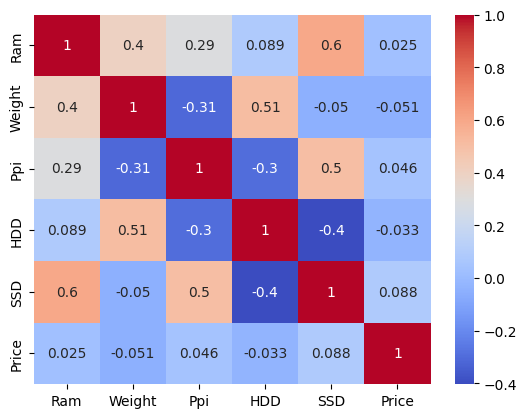

In [129]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')